## Introduction
This notebook is based on the Stack Overflow Developer Survey 2023, which is a comprehensive survey of developers around the world. The survey covers various topics such as programming languages, tools, frameworks, platforms, education, employment, salary, AI, and more. The notebook aims to provide insights and analysis on the survey data using Python code and visualizations. The notebook is organized into sections that correspond to different questions and themes of the survey. Each section contains a question, a code cell that imports and processes the survey data, and a visualization that illustrates the answer. The notebook also provides some commentary and interpretation of the results. The report is intended for anyone who is interested in learning more about the data science job market.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
df_results = pd.read_csv(r'survey_results_public.csv')

In [4]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [139]:
df_schema = pd.read_csv(r'survey_results_schema.csv', index_col='qname')['question']
df_schema

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
Q310           <div><span style="font-size:19px;"><strong>You...
Q120                                                            
S1             <span style="font-size:22px; font-family: aria...
                                     ...                        
Knowledge_7    Waiting on answers to questions often causes i...
Knowledge_8    I feel like I have the tools and/or resources ...
Frequency_1    Needing help from people outside of your immed...
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
Name: question, Length: 78, dtype: object

Let's first look at some infographic.

The pie chart shows the distribution of respondents by age group. Most of them are between 25 and 34 years old.

Text(0.5, 1.0, 'Age Groups')

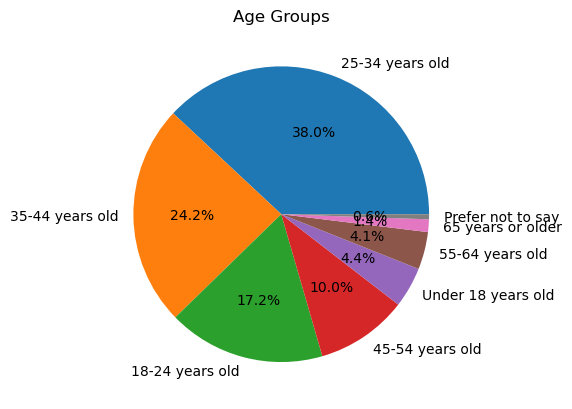

In [356]:
plt.pie(x=df_results['Age'].value_counts(), labels=df_results['Age'].value_counts().index, autopct='%1.1f%%')
plt.title('Age Groups')

The histogram shows the distribution of respondents by years of work experience. Most of them have less than 10 years of experience

Text(0, 0.5, 'Number of responsents')

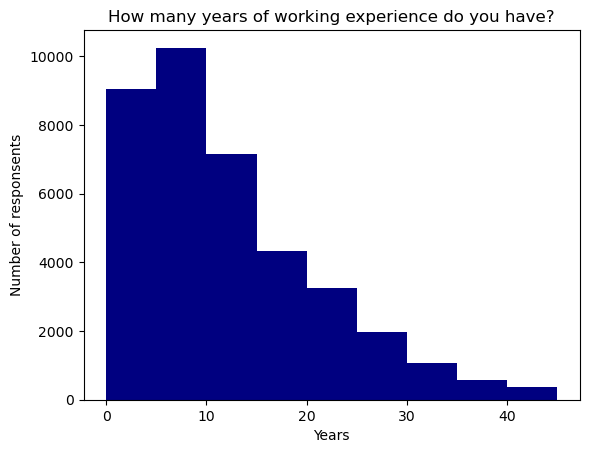

In [218]:
import numpy as np
plt.hist(x=df_results['WorkExp'], bins=np.arange(0,50,5), color='navy')
plt.title(df_schema['WorkExp'])
plt.xlabel('Years')
plt.ylabel('Number of responsents')

The histogram shows the distribution of respondents by years of professional coding experience. Most of them have less than 10 years of experience as well.

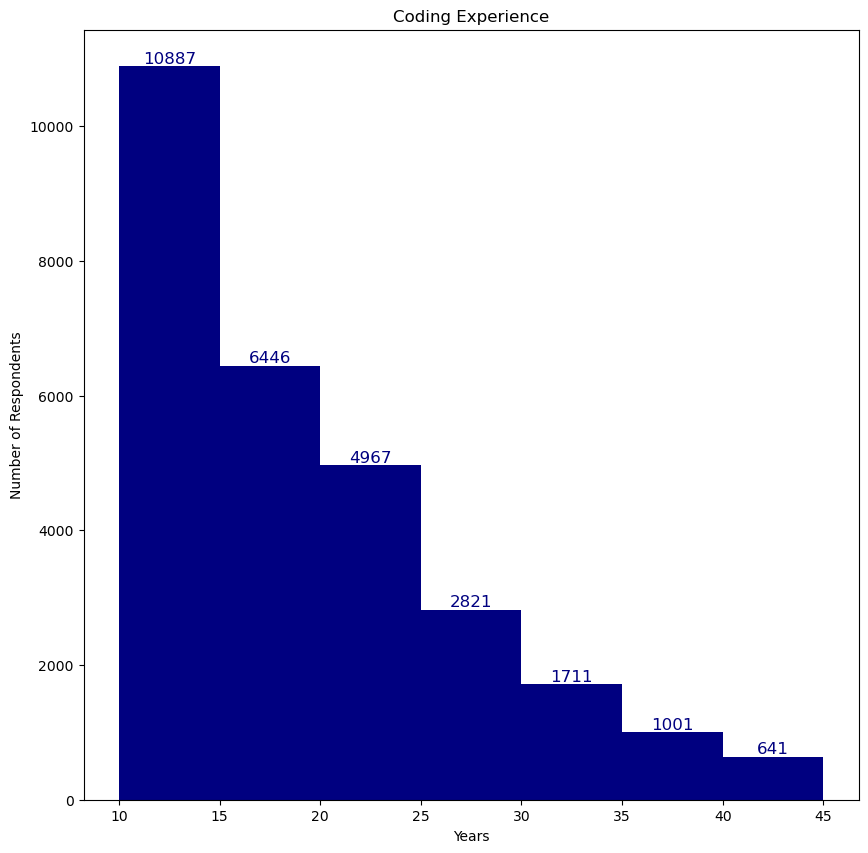

In [355]:
import numpy as np

plt.subplots(figsize=(10,10))
values, bins, bars = plt.hist(x='YearsCodePro', bins=np.arange(10,50,5), data=df_results, color='navy')
plt.bar_label(bars, fontsize=12, color='navy')
plt.xlabel('Years')
plt.ylabel('Number of Respondents')
plt.title('Coding Experience');

The bar plot shows the level of education for developers. Most of them have a bachelor’s degree or higher.

Text(0, 0.5, 'Education')

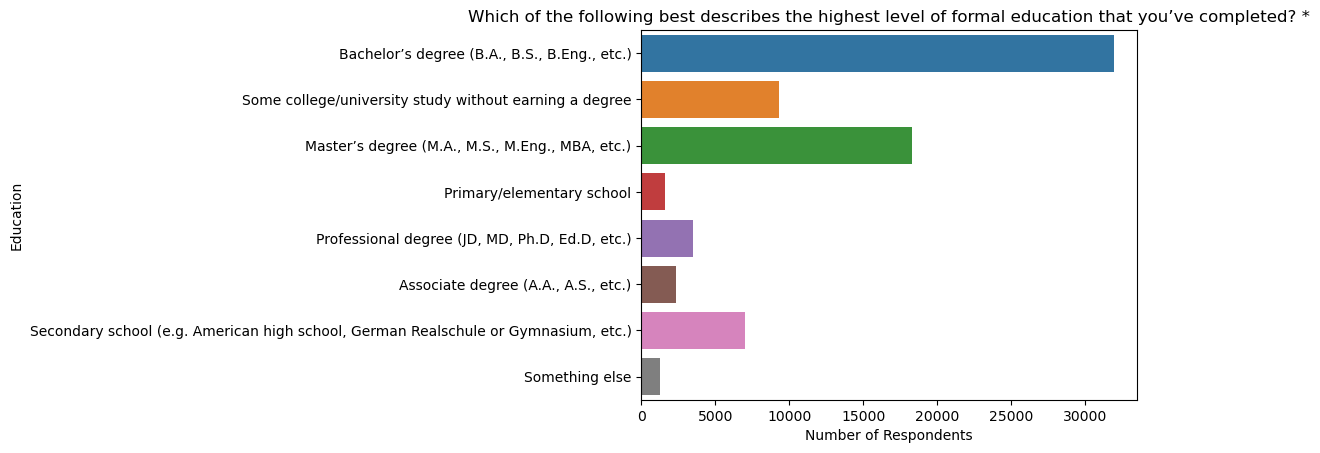

In [354]:
sns.countplot(y=df_results['EdLevel'])
plt.title(df_schema['EdLevel'])
plt.xlabel('Number of Respondents')
plt.ylabel('Education')

In [225]:
df_results['DevType'].value_counts()

DevType
Developer, full-stack                            21681
Developer, back-end                              12149
Developer, front-end                              4356
Developer, desktop or enterprise applications     3455
Other (please specify):                           2650
Developer, mobile                                 2189
Engineering manager                               1848
Developer, embedded applications or devices       1616
Data scientist or machine learning specialist     1322
DevOps specialist                                 1190
Research & Development role                       1185
Senior Executive (C-Suite, VP, etc.)              1149
Engineer, data                                    1125
Academic researcher                                935
Cloud infrastructure engineer                      905
Developer, game or graphics                        711
Data or business analyst                           708
System administrator                               612
Pr

For salary, we should take care of the outliners first

In [7]:
df_results.loc[56322, 'CompTotal'] = 0
df_results.loc[18463, 'CompTotal'] = 0

It is remarkable that developers in the IT industry receive significantly more than those in other industries.

Text(0.5, 0, 'Salary')

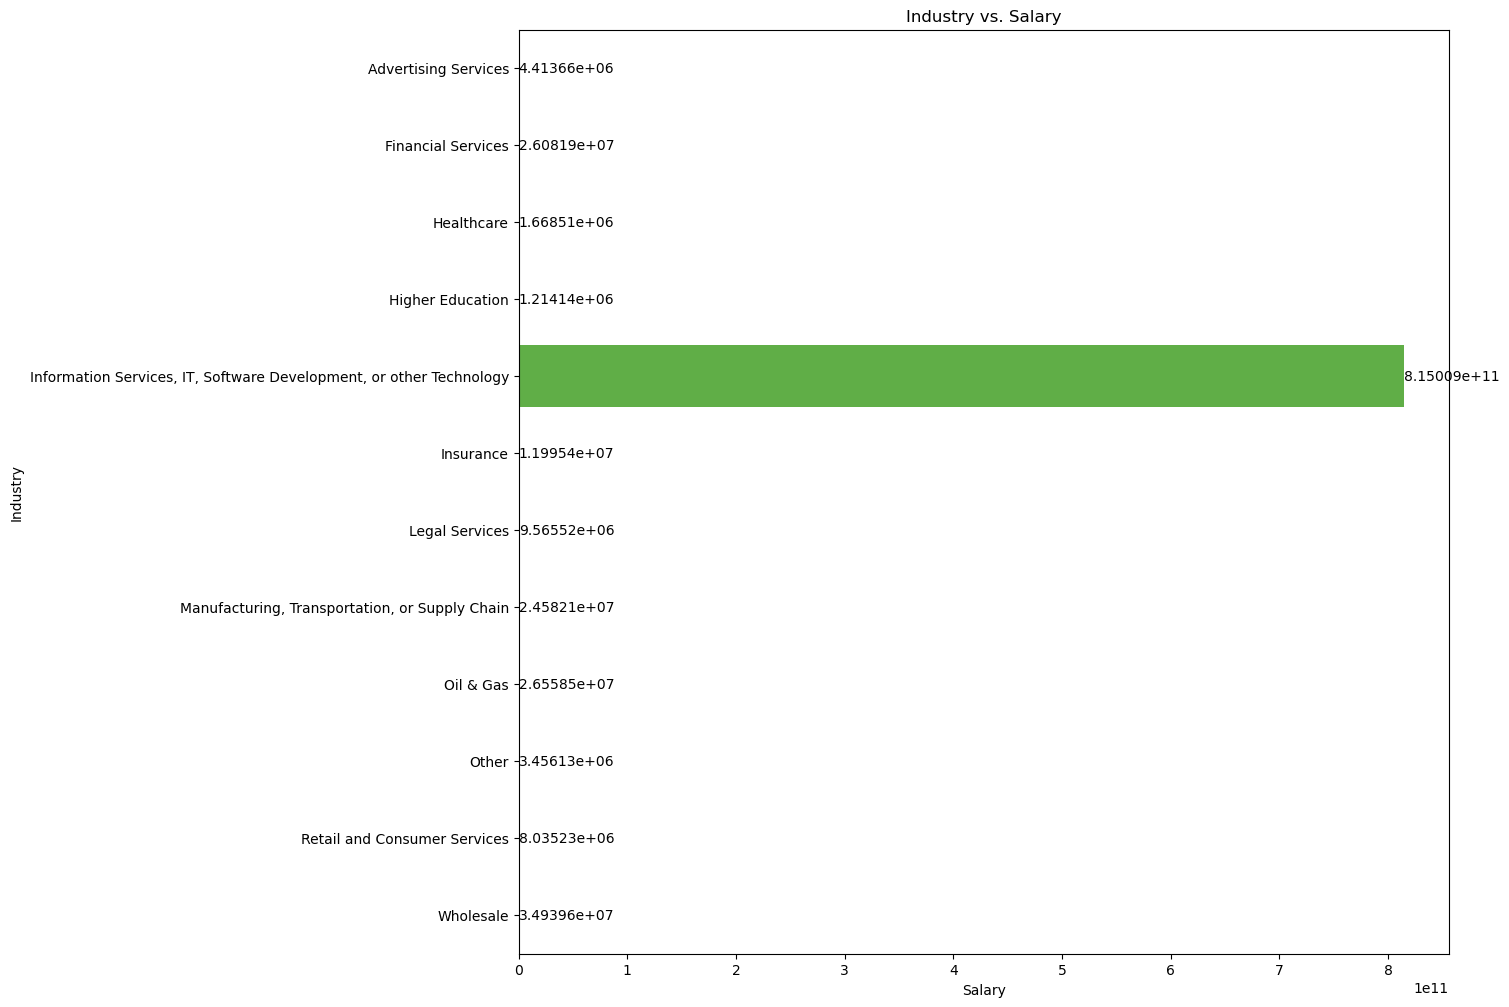

In [353]:
industry_vs_salary_df = df_results.groupby('Industry')['CompTotal'].mean().reset_index()

plt.subplots(figsize=(12,12))
ax = sns.barplot(data=industry_vs_salary_df, x='CompTotal', y='Industry')
ax.bar_label(ax.containers[0])
plt.title('Industry vs. Salary')
plt.xlabel('Salary')

Excluding the IT industry, we can see that the wholesale industry provides the greatest amount of salary to developers, whereas developers working in education and healthcare industry receive the least.

Text(0.5, 0, 'Salary')

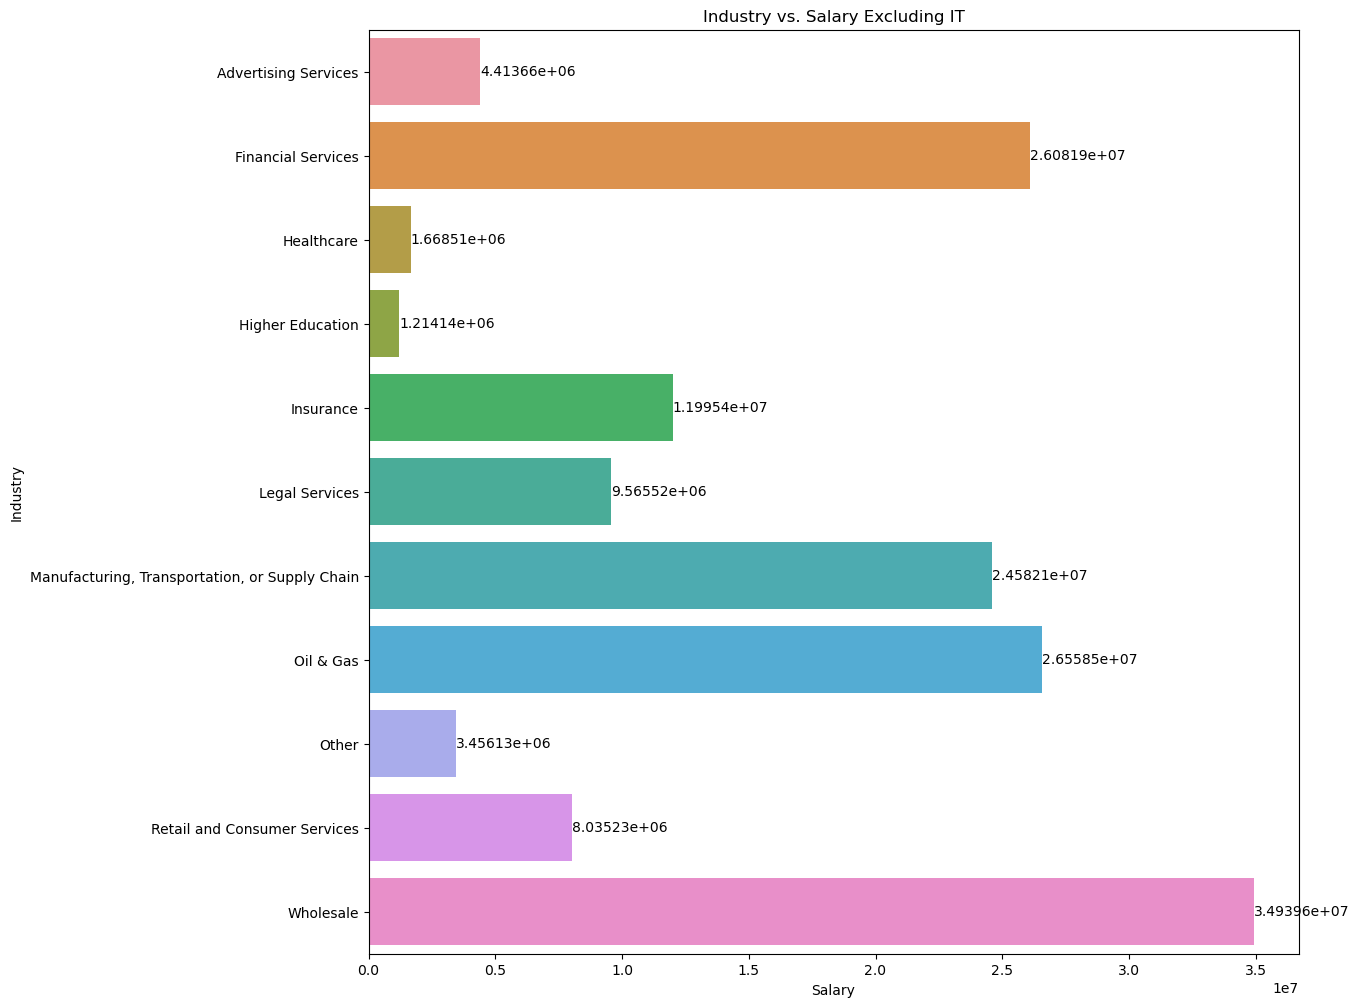

In [352]:
industry_vs_salary_noIT_df= industry_vs_salary_df[industry_vs_salary_df['CompTotal'] < 10**10]

plt.subplots(figsize=(12,12))
ax = sns.barplot(data=industry_vs_salary_noIT_df, y='Industry', x='CompTotal')
ax.bar_label(ax.containers[0])
plt.title('Industry vs. Salary Excluding IT')
plt.xlabel('Salary')

The bar plot shows the frequency of remote work options for developers. Most of them prefer to work remotely or have some flexibility in their schedule.

Text(0, 0.5, 'Number of Respondents')

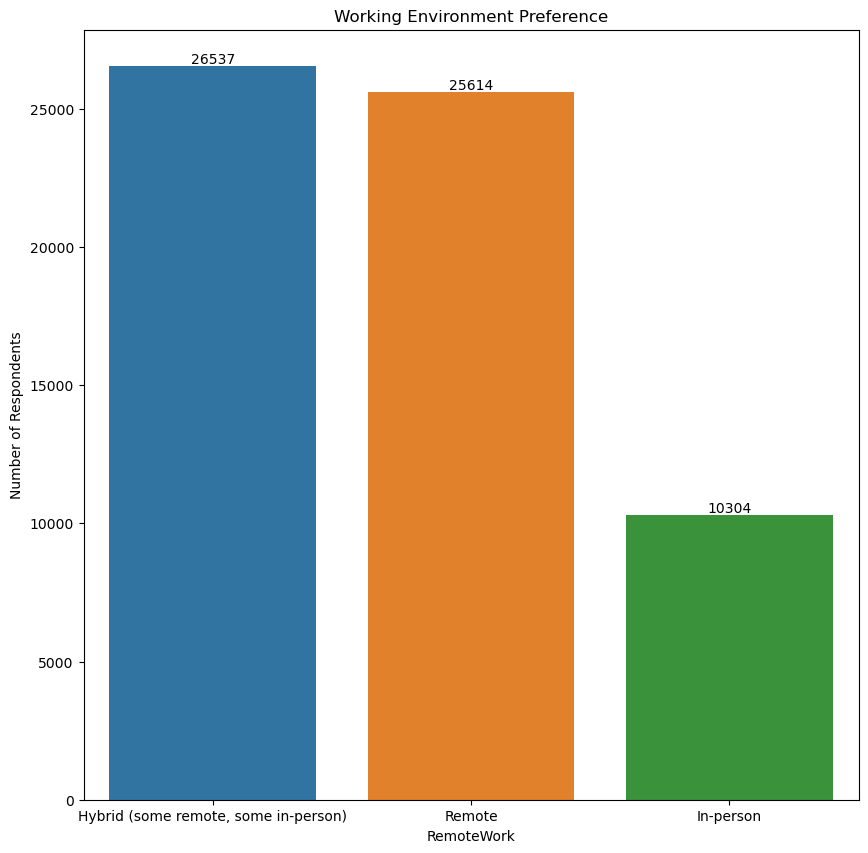

In [347]:
plt.subplots(figsize = (10,10))
ax = sns.barplot(x=df_results['RemoteWork'].value_counts().index, y=df_results['RemoteWork'].value_counts())
ax.bar_label(ax.containers[0])
plt.title('Working Environment Preference')
plt.ylabel('Number of Respondents')

In [ ]:
df_results['YearsCodePro'] = df_results['YearsCodePro'].replace('More than 50 years', '50')
df_results['YearsCodePro'] = df_results['YearsCodePro'].replace('Less than 1 year', '0')
df_results['YearsCodePro'] = df_results['YearsCodePro'].fillna('0')
df_results['YearsCodePro'] = df_results['YearsCodePro'].astype('Int64')

The scatter plot seems to show that the salary has a negative relationship with the professional coding experience

Text(0, 0.5, 'Salary')

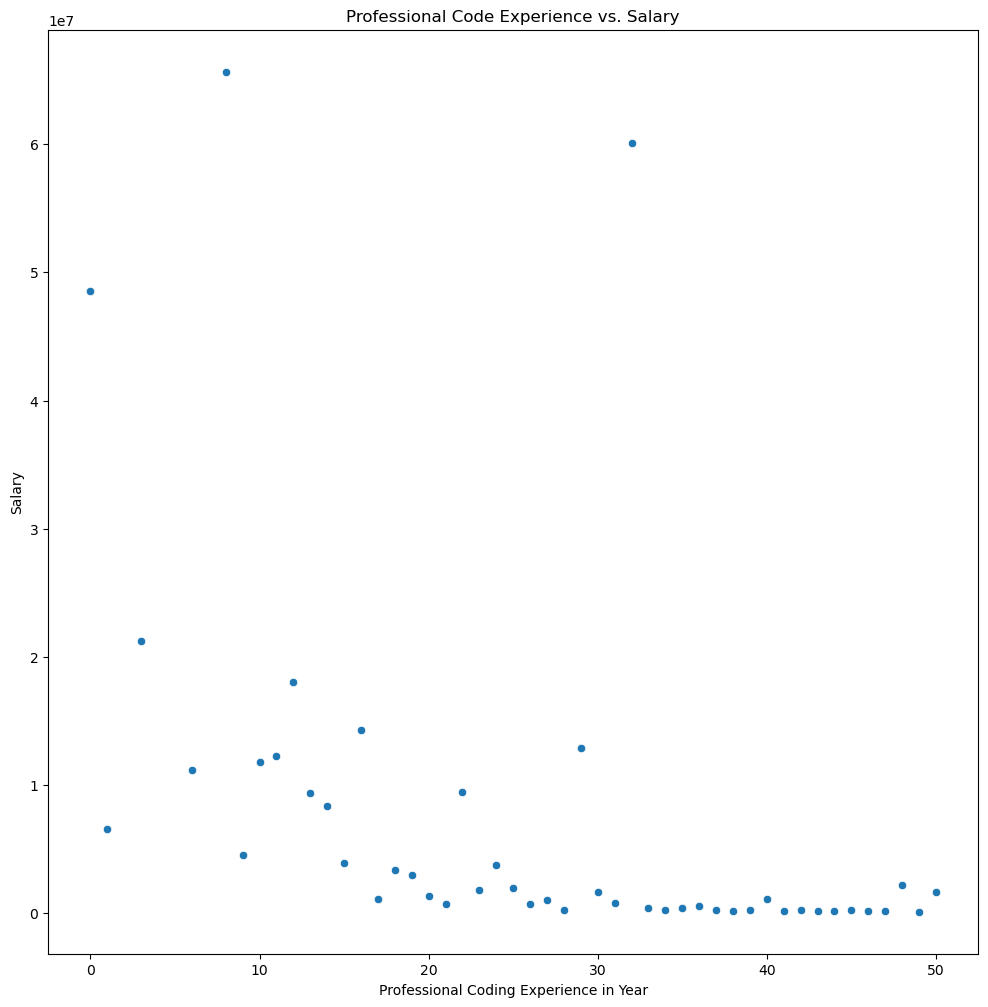

In [346]:
exp_vs_salary_df = df_results.groupby('YearsCodePro')['CompTotal'].mean().reset_index()

plt.subplots(figsize=(12,12))
sns.scatterplot(data=exp_vs_salary_df[exp_vs_salary_df['CompTotal'] < 10**9], x='YearsCodePro', y='CompTotal')
plt.title('Professional Code Experience vs. Salary')
plt.xlabel('Professional Coding Experience in Year')
plt.ylabel('Salary')

The bar plot shows the methods of learning to code for developers. Online resources are the most popular, followed by books and school.

In [ ]:
books = df_results['LearnCode'].str.contains(r'Books').sum()
hackathons = df_results['LearnCode'].str.contains(r'Hackathons').sum()
online = df_results['LearnCode'].str.contains(r'Online').sum() + df_results['LearnCode'].str.contains(r'online').sum()
bootcamp = df_results['LearnCode'].str.contains(r'Bootcamp').sum()
school = df_results['LearnCode'].str.contains(r'School').sum()
job_training = df_results['LearnCode'].str.contains(r'job training').sum()
friend_family_colleague = df_results['LearnCode'].str.contains(r'Friend').sum() + df_results['LearnCode'].str.contains(r'Colleague').sum()

Text(0, 0.5, 'Number of Respondents')

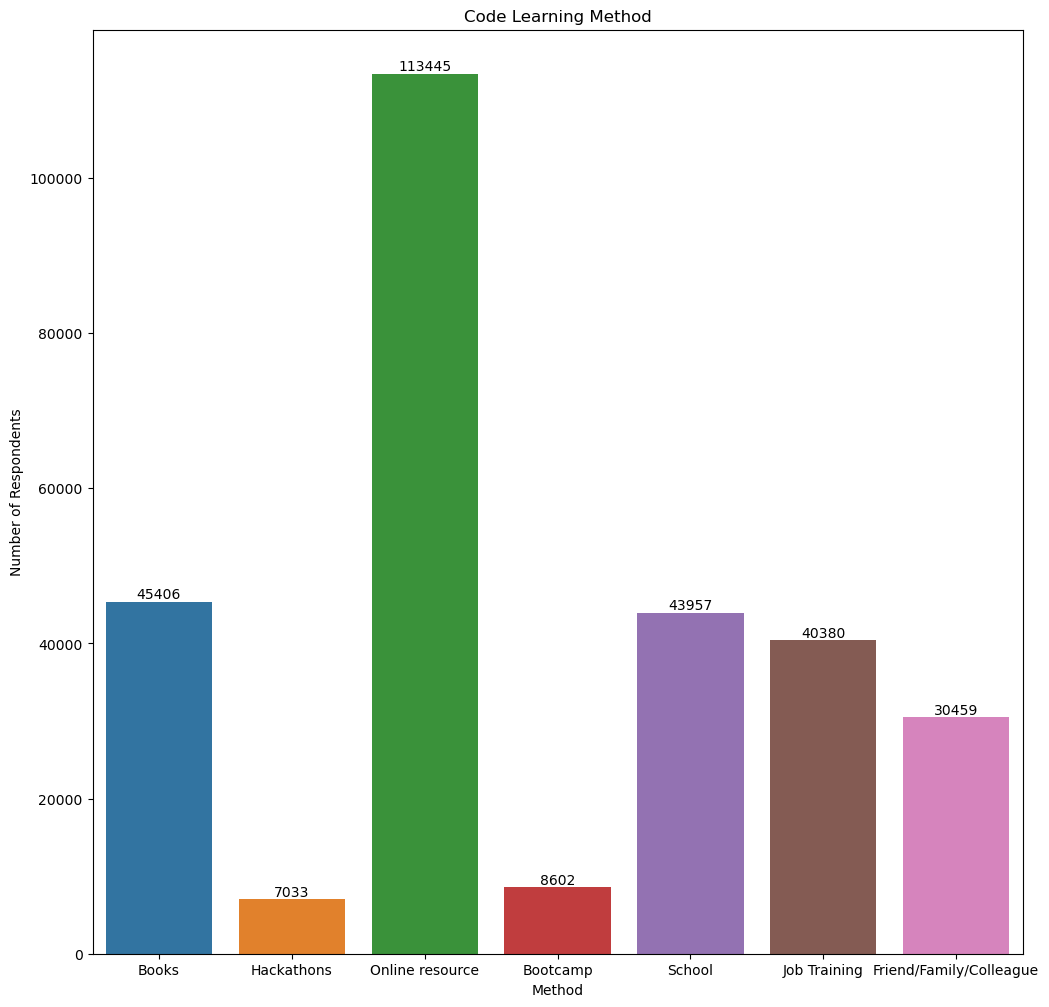

In [342]:
plt.subplots(figsize=(12,12))
ax = sns.barplot(x=['Books', 'Hackathons', 'Online resource', 'Bootcamp', 'School', 'Job Training', 'Friend/Family/Colleague'], y=[books, hackathons, online, bootcamp, school,job_training, friend_family_colleague])
ax.bar_label(ax.containers[0])
plt.title('Code Learning Method')
plt.xlabel('Method')
plt.ylabel('Number of Respondents')

The bar plot shows the employment status by level of education for developers. Having a master’s degree does not significantly improve the chances of having a full-time job.

In [ ]:
education_vs_employment_df = (df_results.groupby('EdLevel')['Employment'].value_counts()*100 / df_results['Employment'].value_counts()).reset_index()
education_vs_employment_df=education_vs_employment_df.rename(columns={'count':'percentage'})

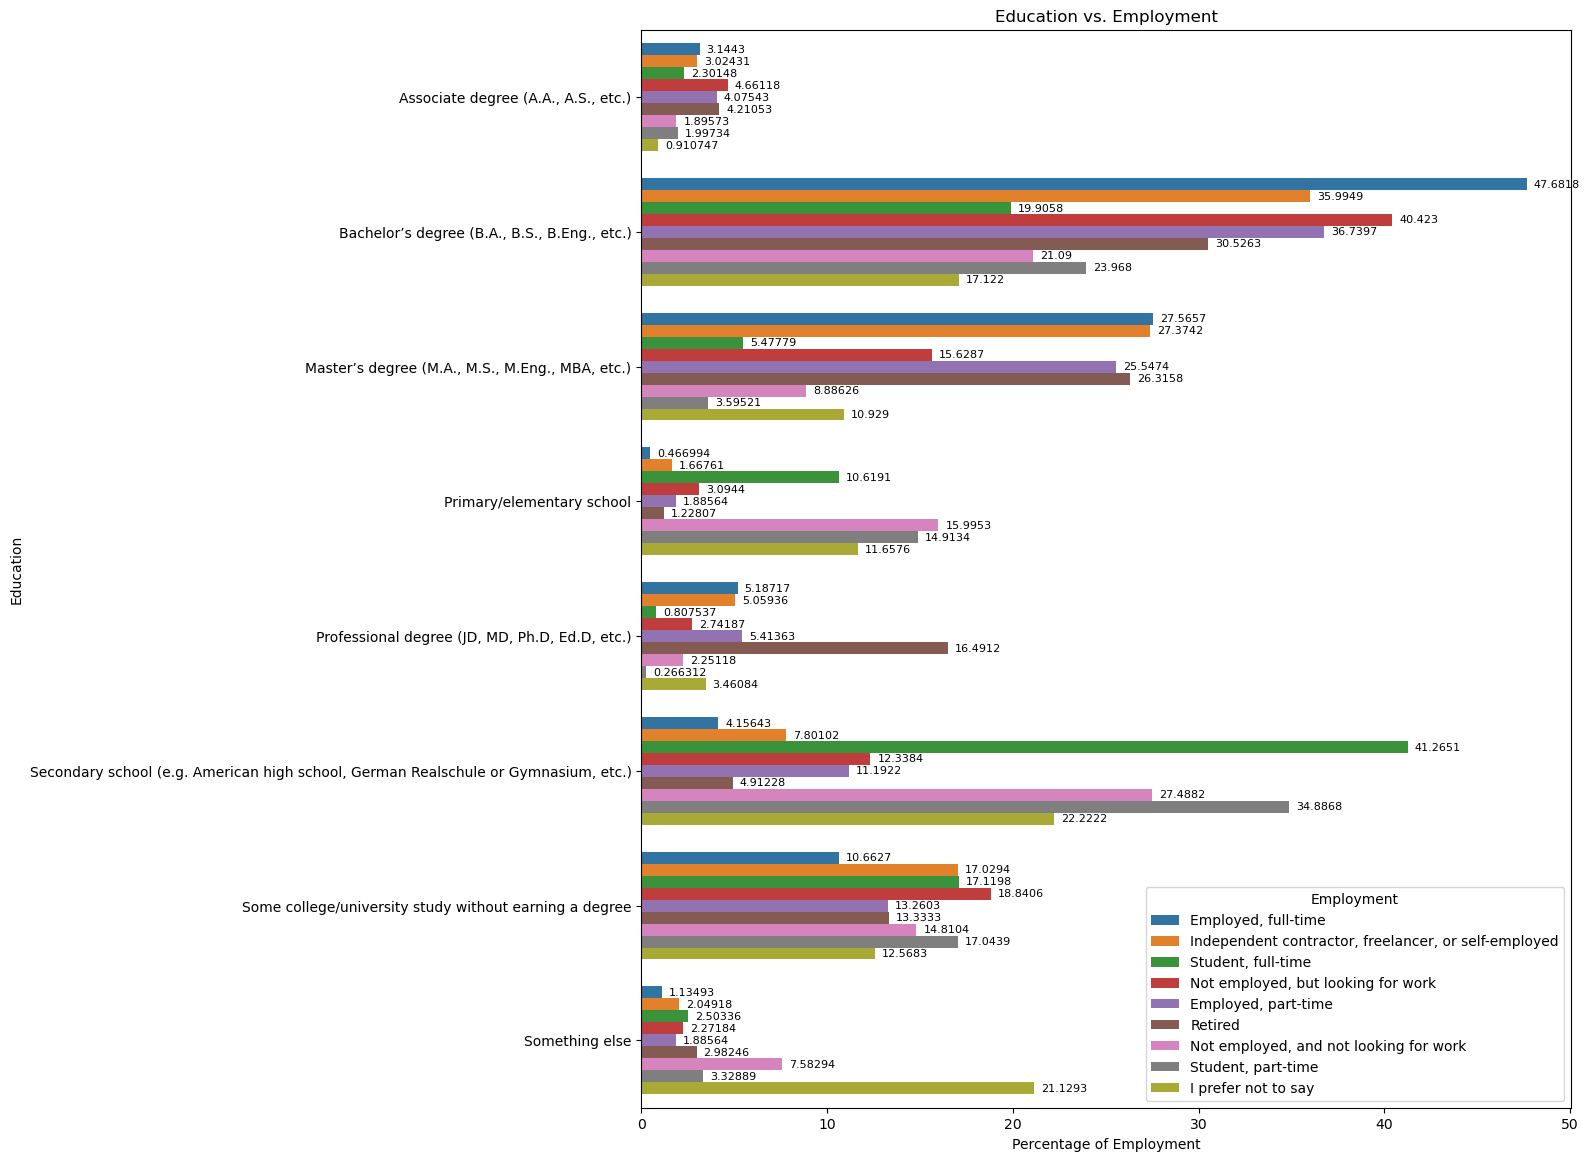

In [341]:
plt.figure(figsize=(12,14))
ax = sns.barplot(data=education_vs_employment_df, y='EdLevel', x='percentage', hue='Employment')
plt.xlabel('Percentage of Employment')
plt.ylabel('Education')
plt.title('Education vs. Employment')

for i in range(9):
    ax.bar_label(ax.containers[i], padding=5, color='black', fontsize=8);

In [148]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

language_worked_df = split_multicolumn(df_results['LanguageHaveWorkedWith'])
language_interest_df = split_multicolumn(df_results['LanguageWantToWorkWith'])

Comparing the language people worked with what they want to work in the future, we can see the **front end development languages, SQL, Python** show up on the top for both charts. Noteably, **Rust, Elixir, and Zig** wasn't a popular language but people are growing interest on it. A more clear result is shown in the next plot.

Text(0.5, 0, 'Number of Respondents')

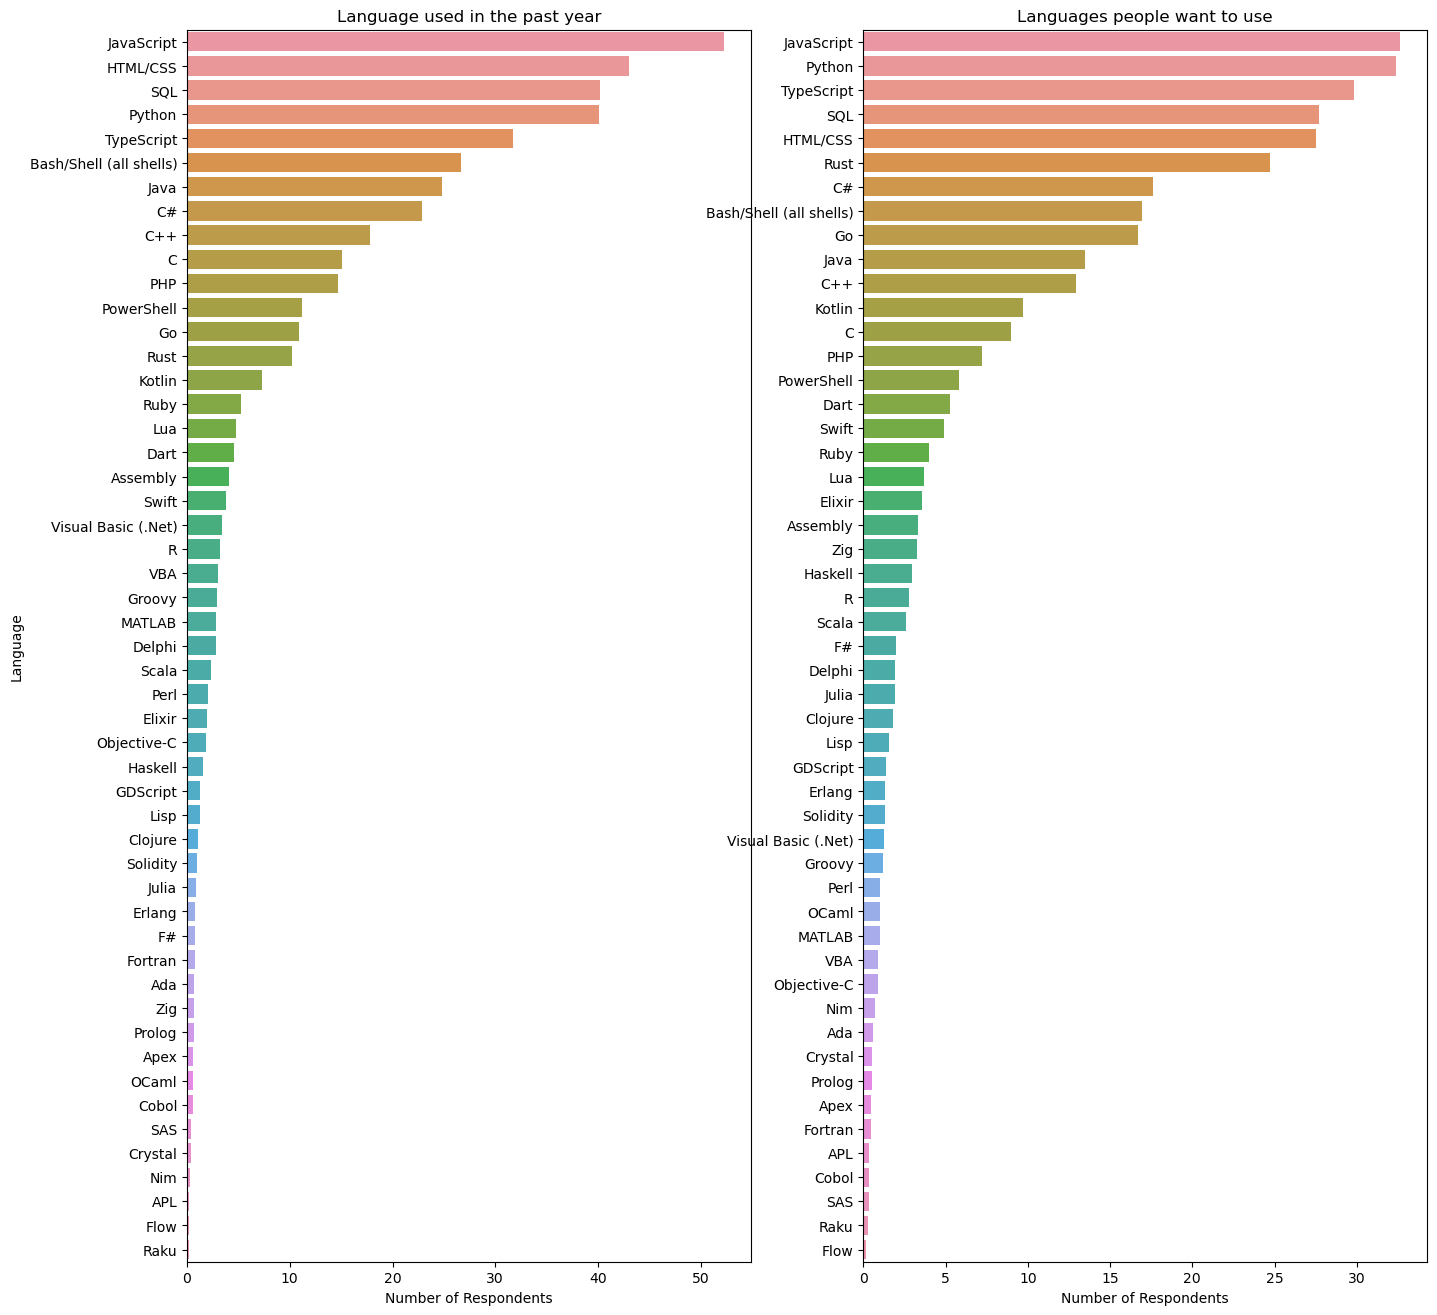

In [339]:
language_worked_pct = language_worked_df.mean().sort_values(ascending=False)*100
language_interest_pct = language_interest_df.mean().sort_values(ascending=False)*100

fig, axes = plt.subplots(ncols=2, figsize=(16,16))
sns.barplot(x=language_worked_pct, y=language_worked_pct.index, ax=axes[0])
axes[0].set_title('Language used in the past year')
axes[0].set_xlabel('Number of Respondents')
axes[0].set_ylabel('Language')
sns.barplot(x=language_interest_pct, y=language_interest_pct.index, ax=axes[1])
axes[1].set_title('Languages people want to use')
axes[1].set_xlabel('Number of Respondents')

In [155]:
language_loved_df = language_worked_df & language_interest_df

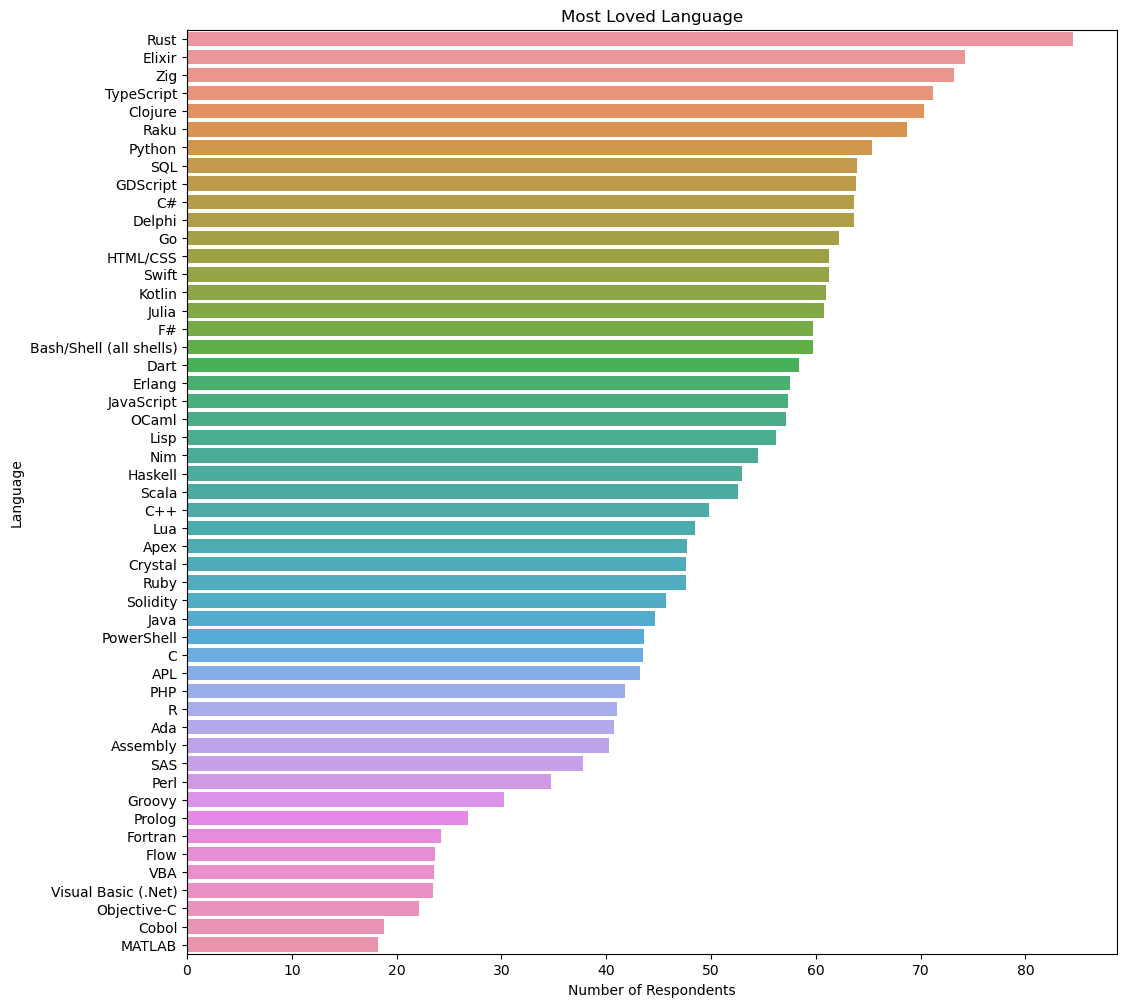

In [337]:
language_loved_pct = (language_loved_df.sum()*100/language_worked_df.sum()).sort_values(ascending=False)
plt.subplots(figsize=(12,12))
sns.barplot(x=language_loved_pct, y=language_loved_pct.index)
plt.title('Most Loved Language')
plt.xlabel('Number of Respondents')
plt.ylabel('Language');

Finally, let's look at the usage of AI tools.

First of all, younger developers tend to adopt AI more.

Text(0.5, 1.0, 'Percentage of Age Groups using AI')

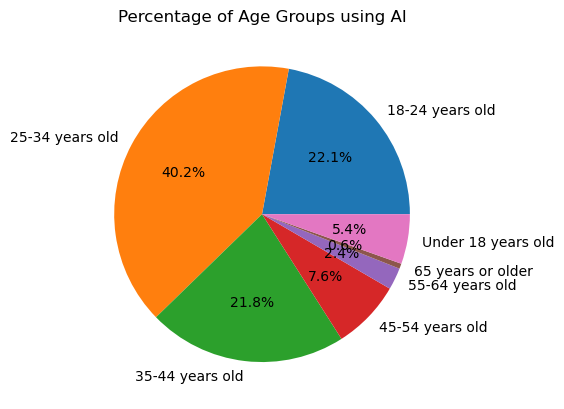

In [330]:
age_vs_AI = df_results.groupby('Age')['AISelect'].value_counts().reset_index()
age_use_AI = age_vs_AI[(age_vs_AI['AISelect'] == 'Yes') & (age_vs_AI['Age'] != 'Prefer not to say')]
plt.pie(x=age_use_AI['count'], labels=age_use_AI['Age'], autopct='%1.1f%%')
plt.title('Percentage of Age Groups using AI')

For AI coding assistants, GitHub Copilot gains the most popularity.

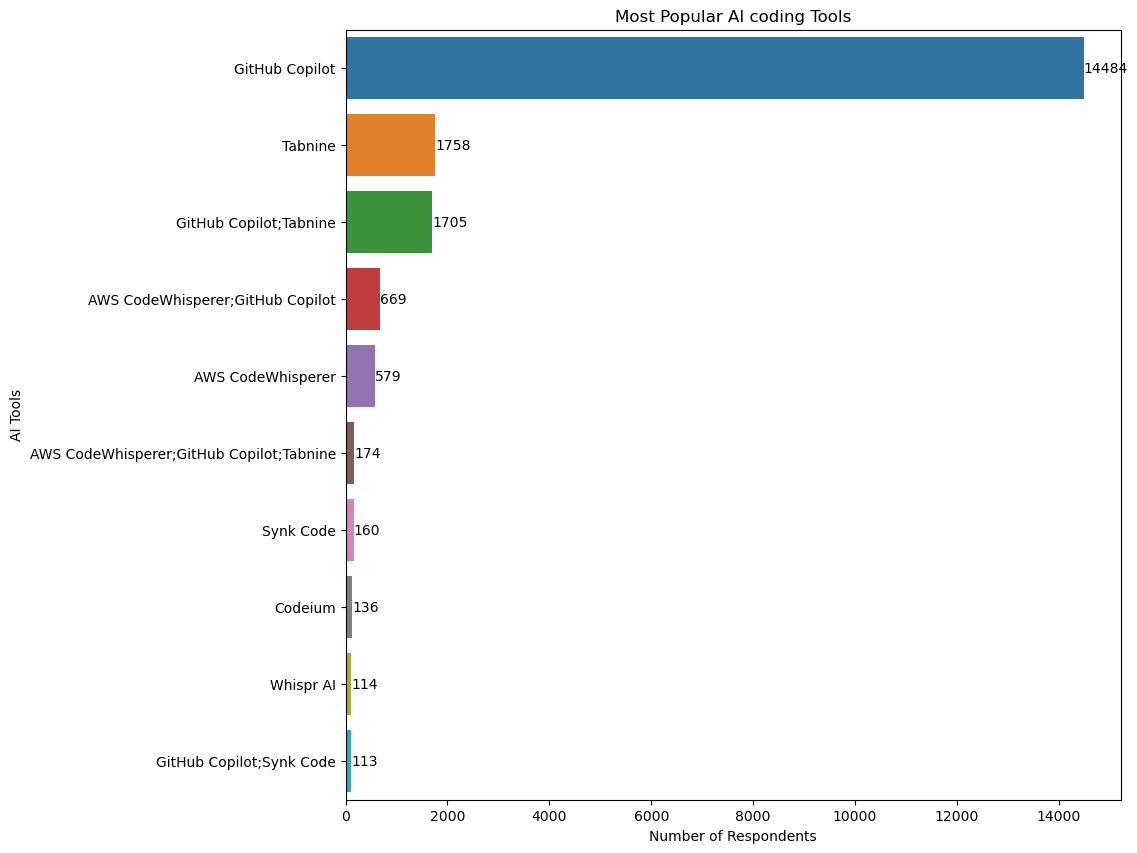

In [336]:
plt.subplots(figsize=(10,10))
ax = sns.barplot(x=df_results['AIDevHaveWorkedWith'].value_counts().nlargest(10), y=df_results['AIDevHaveWorkedWith'].value_counts().nlargest(10).index)
plt.title('Most Popular AI coding Tools')
ax.bar_label(ax.containers[0])
plt.xlabel('Number of Respondents')
plt.ylabel('AI Tools');

In [290]:
AI_search_df = split_multicolumn(df_results['AISearchHaveWorkedWith'])

,ChatGPT,Google Bard AI,Neeva AI,Bing AI,WolframAlpha,Andi,Phind,You.com,Perplexity AI,Quora Poe,Metaphor
0,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
89179,False,False,False,False,False,False,False,False,False,False,False
89180,False,False,False,False,False,False,False,False,False,False,False
89181,True,False,False,False,False,False,False,False,False,True,False
89182,False,False,False,False,False,False,False,False,False,False,False


For AI searching tool, ChatGPT is still dominating the chart but others are not too far behind.

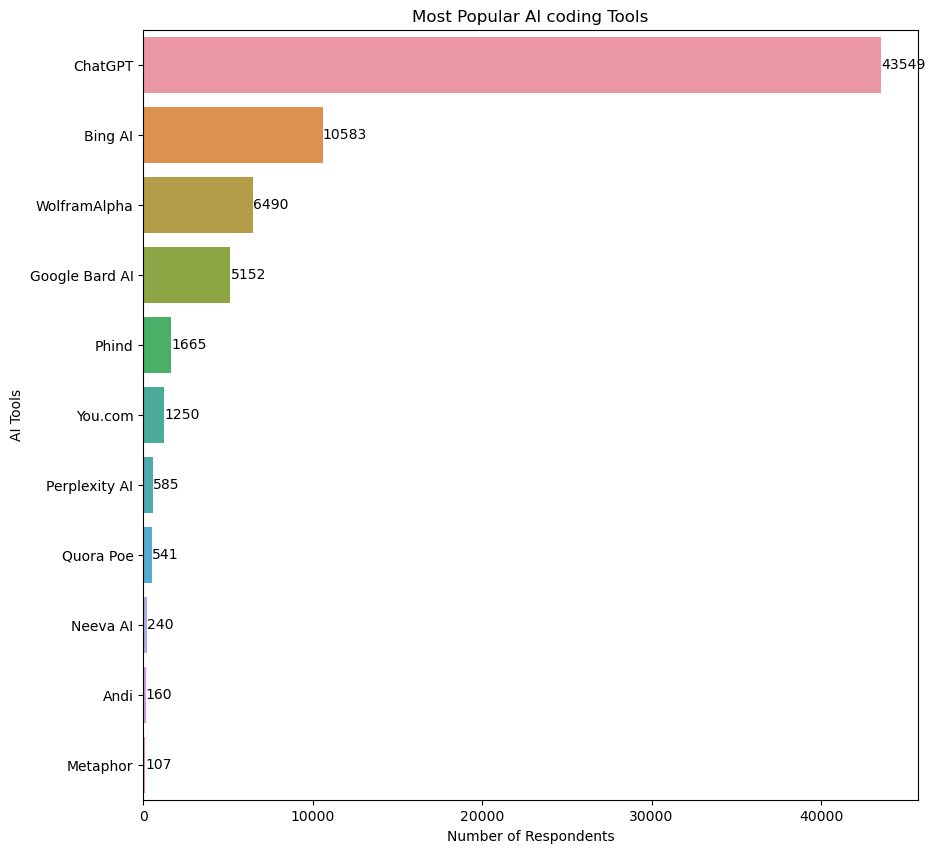

In [335]:
plt.subplots(figsize=(10,10))
ax = sns.barplot(x=AI_search_df.sum().sort_values(ascending=False), y=AI_search_df.sum().sort_values(ascending=False).index)
plt.title('Most Popular AI coding Tools')
ax.bar_label(ax.containers[0])
plt.xlabel('Number of Respondents')
plt.ylabel('AI Tools');

In [325]:
AI_benefit = split_multicolumn(df_results['AIAcc'])
AI_benefit

,Other (please explain),Greater efficiency,Improve accuracy in coding,Increase productivity,Speed up learning,Improve collaboration
0,False,False,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
89179,False,False,False,False,False,False
89180,False,False,False,False,False,False
89181,False,False,False,False,False,False
89182,False,False,False,False,False,False


This pie chart shows the most common reasons for using AI tools, and most of them take advantage of AI tools due to its productivity and efficiency.

Text(0.5, 1.0, 'Reasons for Using AI Tools')

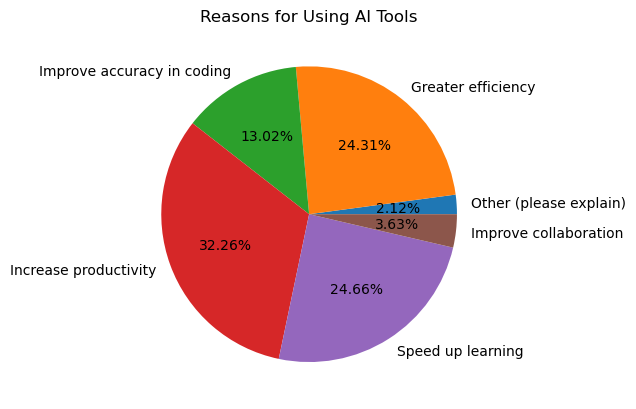

In [331]:
plt.pie(x=AI_benefit.sum(), labels=AI_benefit.sum().index, autopct='%1.2f%%')
plt.title("Reasons for Using AI Tools")



## Inference
- Developers in the IT industry get paid the most, while those in education and healthcare get paid the least.
- Developers value remote working and prefer not to show up in the office.
- Experience in coding does not have a strong relationship with salary.
- Online resources are the most popular method of learning to code, followed by books and hackathons2.
- Having a master’s degree does not significantly improve the chances of having a full-time job as a developer1.
- Front end development languages, Python, and SQL are the most popular languages, but Rust, Elixir, and Zig are what the developers want to keep diving in.
- Younger developers tend to adopt AI more than older ones.
- GitHub Copilot is the most popular AI coding assistant among developers.
- The most common reasons for using AI tools are productivity and efficiency.

## Conclusion
This concludes that the Stack Overflow Developer Survey is a valuable source of information for understanding the current state and trends of the developer community. The report also suggests some possible areas for further exploration and research, such as:

- How do developers cope with the rapid changes and challenges in the technology landscape?
- How do developers balance their personal and professional lives?
- How do developers contribute to social good and ethical issues through their work?
- How do developers collaborate and communicate with diverse and global teams?